# Introduction to Regression with Neural Networks in Tensorflow

In [26]:
import tensorflow as tf

In [27]:
print(tf.__version__)

2.15.0


In [28]:
import numpy as np
import matplotlib.pyplot as plt

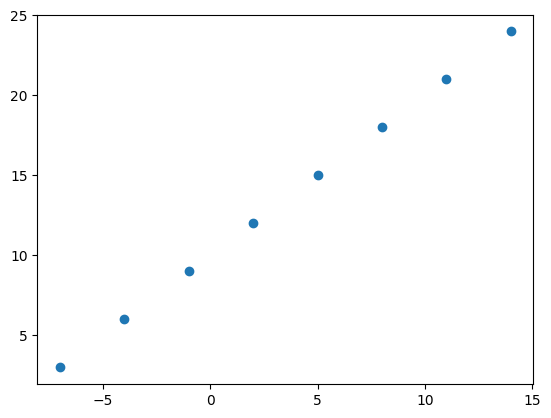

In [29]:
# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize
plt.scatter(X,y)

This relationship is y = x + 10

In [30]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [31]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [32]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [33]:
X[0], y[0]

(-7.0, 3.0)

In [34]:
# Turn numpy arrays into tensors

X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [35]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [36]:
# Steps in modeling with tensorflow

#1. Creating a model - define the input and output layers, as well as hidden layers of a deep learning model.
#2. Compiling a model - define the loss function ( in other words, the function which tells our model how wrong it is ) and the optimizer ( tells our model how to improve the patterns its learning ) and evaluation metrics ( what we can use to interpret the performance of our model ).
#3. Fitting a model - letting the model try find patterns between x and y ( features and model ).

In [37]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 332ms/step - loss: 15.8991 - mae: 15.8991
Epoch 2/20
1/1 [==============================] - 0s 10ms/step - loss: 15.6179 - mae: 15.6179
Epoch 3/20
1/1 [==============================] - 0s 12ms/step - loss: 15.3366 - mae: 15.3366
Epoch 4/20
1/1 [==============================] - 0s 11ms/step - loss: 15.0554 - mae: 15.0554
Epoch 5/20
1/1 [==============================] - 0s 11ms/step - loss: 14.8344 - mae: 14.8344
Epoch 6/20
1/1 [==============================] - 0s 9ms/step - loss: 14.7019 - mae: 14.7019
Epoch 7/20
1/1 [==============================] - 0s 11ms/step - loss: 14.5694 - mae: 14.5694
Epoch 8/20
1/1 [==============================] - 0s 9ms/step - loss: 14.4369 - mae: 14.4369
Epoch 9/20
1/1 [==============================] - 0s 10ms/step - loss: 14.3044 - mae: 14.3044
Epoch 10/20
1/1 [==============================] - 0s 10ms/step - loss: 14.1719 - mae: 14.1719
Epoch 11/20
1/1 [==============================] - 0s 12ms/s

In [38]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [39]:
# make a prediction
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 95ms/step


array([[3.082855]], dtype=float32)

# Improving our model
We can improve our model, by altering the steps we took to create a model.
1. Add more layers, neurons, change activation function of each layers
2. Change optimization function function or the learning rate of the optimization function
3. Fit a model for more epochs, leave it training for more time or give model more data to learn from

In [40]:
# making change in our model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation=None))
model.add(tf.keras.layers.Dense(1))

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1 ), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 786ms/step - loss: 12.9289 - mae: 12.9289
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.1546 - mae: 12.1546
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.3700 - mae: 11.3700
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5746 - mae: 10.5746
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 9.7675 - mae: 9.7675
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9472 - mae: 8.9472
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1119 - mae: 8.1119
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.2599 - mae: 7.2599
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8076 - mae: 6.8076
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.1136 - mae: 7.1136
Epoch 11/100
1/1 [==============================] - 0s 10ms/s

In [41]:
model.predict([17.0]) # model is overfitting so keep twiking the model and select the best while experimenting

1/1 [==============================] - 0s 157ms/step


array([[27.128107]], dtype=float32)

# Evaluating the model performance

In practice, a typical workflow we go through when building a neural network
Build a model -> Evaluate -> tweak model -> Evaluate -> tweak model -> Evaluate -> tweak model -> Evaluate -> Tweak -> Evaluate

## Visualize
* Data
* The model itself
* The training of model
* Predictions of model

In [42]:
# make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [43]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

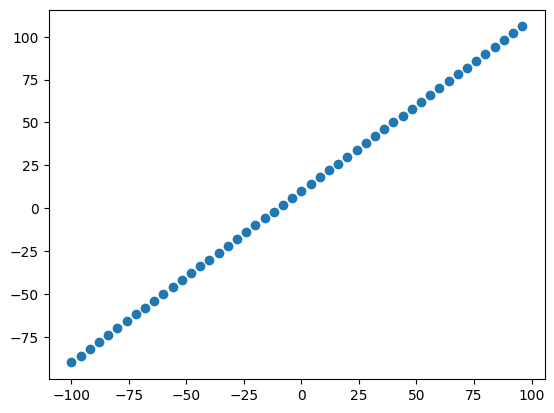

In [44]:
# visualize the data
plt.scatter(X, y)

In [45]:
### The 3 sets:
# 1. Traning set -> Model learns from these data typically 70-80 percent of available data
# 2. Validation set -> The model gets tuned on this data, typical;y 10-15 percent
# 3. Test set -> Evaluating the model with this data, typically 10-15 percent of the total data

In [46]:
len(X)

50

In [47]:
# split the data into train and test set
X_train = X[:40] # 80 percent of the data
X_test = X[40:] # 20 percent of the data


y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

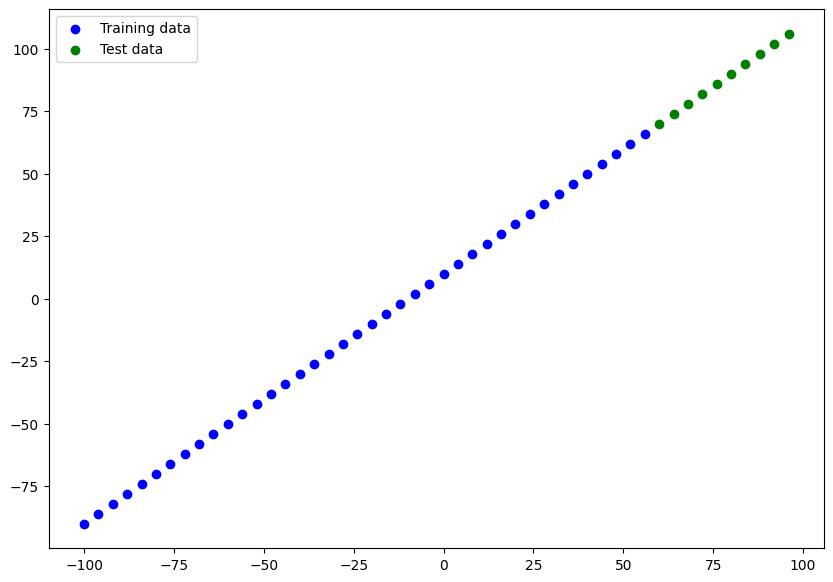

In [48]:
# visualizing the training and testing data
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.legend()

In [49]:
# Building a neural network for our data


# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]
)
# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=1), y_train)

In [50]:
# model.build()
# model.summary() # to see model summary first we need to build a model by build or fit a model

In [51]:
# model which builds automatically by defining the input shape argument in the first layer

# 1. Create a model
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),# our input is just a scalar number
    tf.keras.layers.Dense(1 , name="Output_layer")
], name="model1")

# 2. Compile a model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

In [52]:
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total Parameters -> total number of parameters in model
* Trainable Parameters -> these are the parameters the model can update as it trains
* Non-Trainable Parameters -> these parameters are not updated during training ( this is typical when we bring already learned parameters from other models during transfer learning )

In [53]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 46.1100 - mae: 46.1100
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 34.3212 - mae: 34.3212
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 38.4912 - mae: 38.4912
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 27.0909 - mae: 27.0909
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.8130 - mae: 14.8130
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8113 - mae: 11.8113
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 12.9080 - mae: 12.9080
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1347 - mae: 11.1347
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.7601 - mae: 40.7601
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 28.1171 - mae: 28.1171
Epoch 11/100
2/2 [==============================] - 0s 6ms

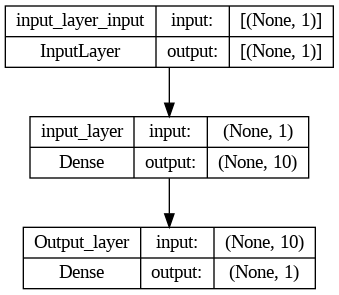

In [54]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes= True)

# Visualizing the model's Prediction

In [55]:
# plot them against the labels

# First make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 52ms/step


array([[ 78.27214 ],
       [ 83.37156 ],
       [ 88.47098 ],
       [ 93.57039 ],
       [ 98.669815],
       [103.76923 ],
       [108.86865 ],
       [113.96808 ],
       [119.0675  ],
       [124.16691 ]], dtype=float32)

In [56]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [57]:
# create a plotting funciton

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels,c="b",label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Test data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  plt.legend()

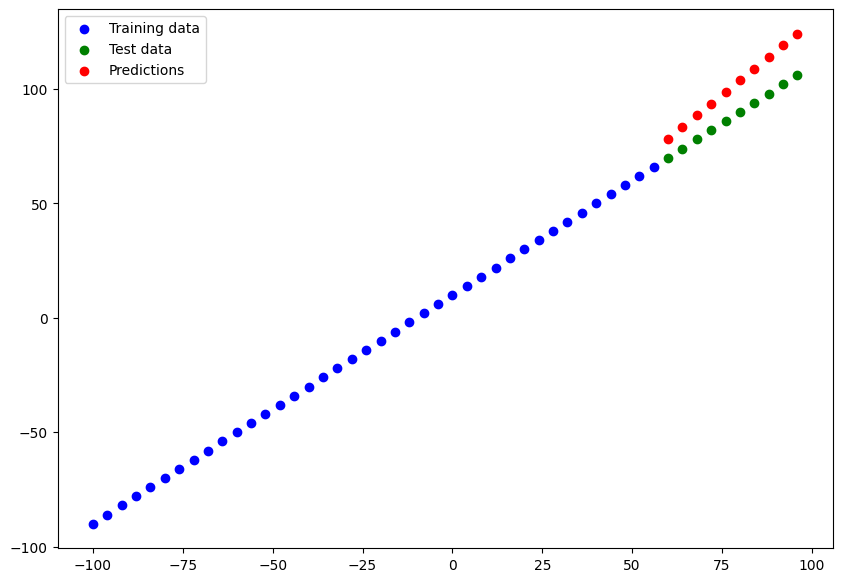

In [58]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

# Evaluating our model prediction with regression evaluation metrics

## For regression two main metrics are:
* MAE
* MSE

In [59]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 13.2195 - mae: 13.2195


[13.21953010559082, 13.21953010559082]

In [64]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.291143, 10.525688, 10.      , 10.714078, 12.801889, 16.215387,
       20.868652, 25.968079, 31.0675  , 36.16691 ], dtype=float32)>

In [68]:
y_pred.shape, y_test.shape

((10, 1), TensorShape([10]))

In [69]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.27214 ,  83.37156 ,  88.47098 ,  93.57039 ,  98.669815,
       103.76923 , 108.86865 , 113.96808 , 119.0675  , 124.16691 ],
      dtype=float32)>

In [73]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred = tf.squeeze(y_pred))

In [74]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.219525>

In [76]:
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(y_pred))

In [77]:
mse

<tf.Tensor: shape=(), dtype=float32, numpy=184.72781>

# Tensorflow modelling experiments to improve model

1. Model1 - same as the original model 1 layer trained for 100 epochs
2. Model2 - 2 layers trained for 100 epochs
3. Model3 - 2 layers trained for 500 epochs

## Model1

In [79]:
# Build model 1
tf.random.set_seed(42)

# 1. Create a model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# 3. Fit the model
model1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 26ms/step - loss: 11.1267 - mae: 11.1267
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 8.1216 - mae: 8.1216
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 10.1743 - mae: 10.1743
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 12.5281 - mae: 12.5281
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 11.5789 - mae: 11.5789
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.6795 - mae: 10.6795
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 9.0236 - mae: 9.0236
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 7.5235 - mae: 7.5235
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 7.7106 - mae: 7.7106
Epoch 10/100
2/2 [==============================] - 0s 13ms/step - loss: 11.7652 - mae: 11.7652
Epoch 11/100
2/2 [==============================] - 0s 11ms

1/1 [==============================] - 0s 99ms/step


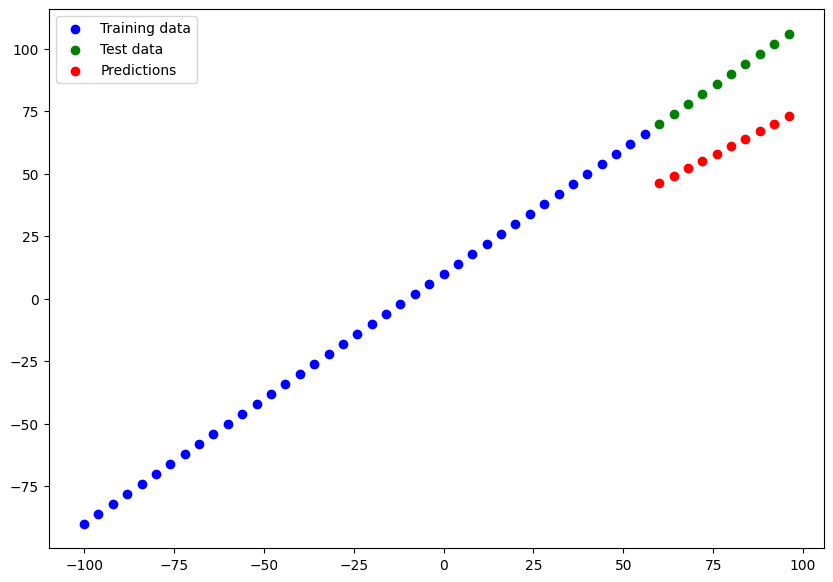

In [80]:
# Make and plot predictions for model1
y_pred_model1 = model1.predict(X_test)
plot_predictions(predictions = y_pred_model1)

In [82]:
mae_1 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_model1))
mse_1 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_model1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=28.418066>,
 <tf.Tensor: shape=(), dtype=float32, numpy=816.0516>)

## Model2

In [85]:
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 18.2677 - mse: 822.4219
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 23.0573 - mse: 722.6279
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 28.3582 - mse: 1215.7277
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 13.7071 - mse: 252.0074
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 18.5574 - mse: 466.7224
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.3478 - mse: 124.1784
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 10.3209 - mse: 139.2396
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2285 - mse: 180.2944
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 42.1764 - mse: 2844.0583
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 29.3519 - mse: 1219.2330
Epoch 11/100
2/2 [============================

1/1 [==============================] - 0s 63ms/step


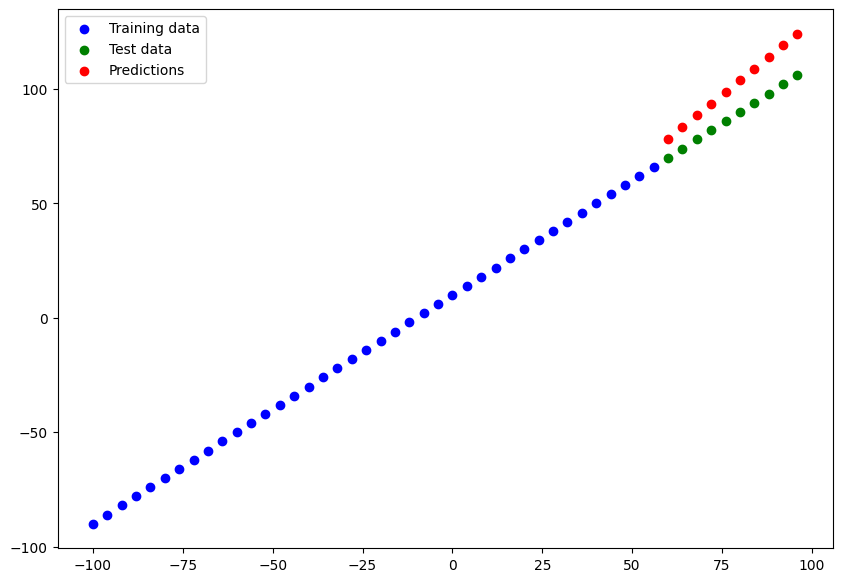

In [86]:
y_pred_2 = model.predict(X_test)
plot_predictions(predictions = y_pred_2)

In [87]:
# Calculate model2 evaluation metrics
mae2 = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mse2 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

mae2, mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.219525>,
 <tf.Tensor: shape=(), dtype=float32, numpy=184.72781>)

## Model3

In [88]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

model3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 2s 22ms/step - loss: 34.6039 - mse: 1712.3861
Epoch 2/500
2/2 [==============================] - 0s 14ms/step - loss: 28.5450 - mse: 1056.9412
Epoch 3/500
2/2 [==============================] - 0s 14ms/step - loss: 32.4440 - mse: 1613.5283
Epoch 4/500
2/2 [==============================] - 0s 13ms/step - loss: 13.8568 - mse: 265.3176
Epoch 5/500
2/2 [==============================] - 0s 13ms/step - loss: 18.9950 - mse: 490.3062
Epoch 6/500
2/2 [==============================] - 0s 13ms/step - loss: 9.5041 - mse: 125.6008
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 10.5217 - mse: 142.3073
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 12.8758 - mse: 225.4525
Epoch 9/500
2/2 [==============================] - 0s 14ms/step - loss: 33.8475 - mse: 1713.4695
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 23.1649 - mse: 750.3273
Epoch 11/500
2/2 [==================

1/1 [==============================] - 0s 31ms/step


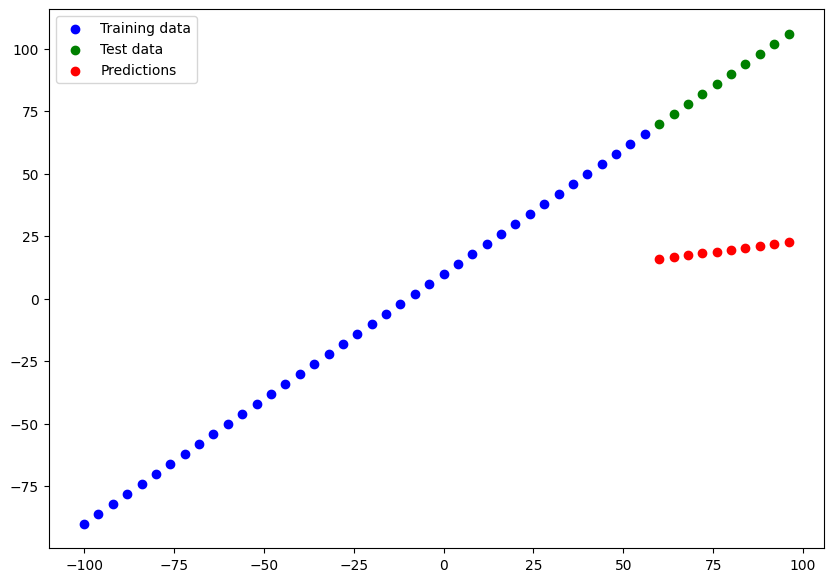

In [90]:
y_pred_3 = model3.predict(X_test)
plot_predictions(predictions = y_pred_3)

In [91]:
# calculate model3 evaluation metrics
mae3 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_3))
mse3 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_3))

mae3, mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71041>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4807.612>)

# Comparing the results of our experiments

In [93]:
# lets compare our model's result using pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae2.numpy(), mse2.numpy()],
                 ['model_3', mae3.numpy(), mse3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["Models", "MAE", "MSE"])
all_results

,Models,MAE,MSE
0,model_1,28.418066,816.051575
1,model_2,13.219525,184.727814
2,model_3,68.710411,4807.611816


Looks like model 2 performs best

* TensorBoard - a component of the TensorFlow library to help track modeling experiments
* Weights and Biases = a tool for tracking all type of machine learning experiments

In [95]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Saving our model

## Save model using savedModel Format


In [96]:
model_2.save("best_model_SavedModel_format")

## Save model using the HDF5 Format

In [97]:
model_2.save("best_model_HDF5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading the saved model

In [98]:
# Loading saved model format
loaded_saved_model_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_saved_model_format.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
# Loading HDF5 format
loaded_HDF5_format = tf.keras.models.load_model("/content/best_model_HDF5.h5")
loaded_HDF5_format.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Download a model or any file from google colab

1. Go to file tab and right click on the file and download it
2. Use code
3. Save it to google drive by connecting google drive and connecting there

In [103]:
# Downnload file using code
from google.colab import files
files.download("/content/best_model_HDF5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
# Mount the drive to google colab

# save a file from google colab to google drive
!cp /content/best_model_HDF5.h5 /content/drive/MyDrive/models